## K means clustering - algorithm

### Use cases:

K-Means is widely used for many applications.

* Image Segmentation
* Clustering Gene Segementation Data
* News Article Clustering
* Clustering Languages
* Species Clustering
* Anomaly Detection

### Algorithms:

* Step 1 - Pick K random points as cluster centers called centroids.
* Step 2 - Assign each xi to the nearest cluster by calculating its distance to each centroid.
* Step 3 - Find new cluster center by taking the average of the assigned points.
* Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

### Table of content

* [K means clustering - sklearn approach](# K means clustering - sklearn approach)
* [How to select the number of K](## How to select the number of K)


In [3]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')

In [4]:
# Importing the dataset - two dimensions
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [41]:
np.array(data)

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ..., 
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [20]:
np.array(list(zip(f1, f2)))

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ..., 
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

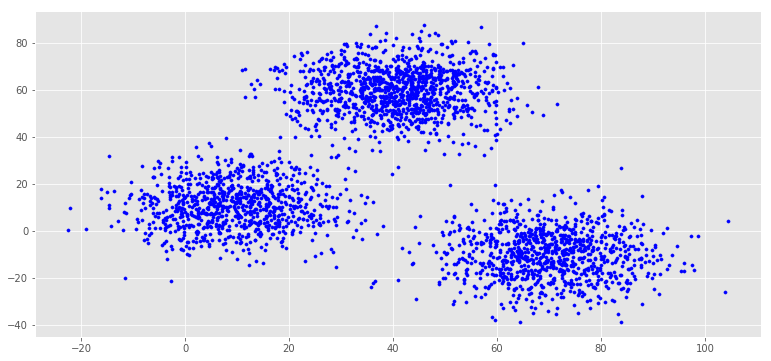

In [5]:
# Getting the values and plotting it
f1 = data['V1']
f2 = data['V2']
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue', s=10)

In [24]:
# Euclidean Distance Caculator
import math
def euc(x, y):
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    return distance

In [29]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [50]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 20.  23.]
 [ 49.  76.]
 [ 11.  14.]]


In [62]:
list(zip(C_x, C_y))

[(20, 23), (49, 76), (11, 14)]

In [47]:
np.sqrt((28-17.93671)**2+(18-15.78481)**2)

10.304216241917674

In [57]:
dist(X[1],C)

array([  7.50440753,  67.75542113,   7.16264563])

In [56]:
np.argmin(dist(X[1],C))

2

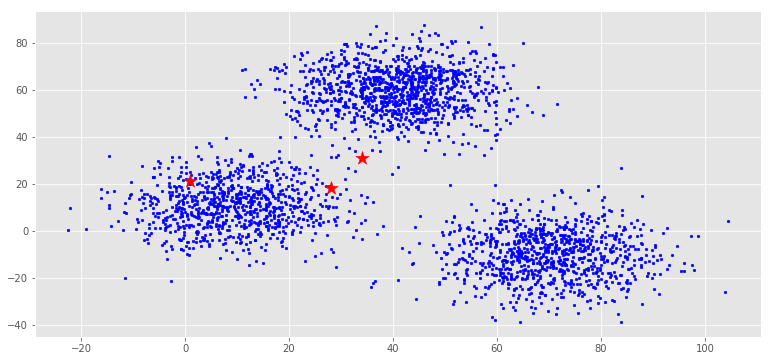

In [37]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='blue', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='red')

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

/Users/gaoweijie/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/gaoweijie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [82]:
tmp = np.array([[1,2,3],[4,5,6]])

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [7]:
from sklearn.metrics import pairwise_distances_argmin

In [30]:
rng = np.random.RandomState(2)
i = rng.permutation(X.shape[0])[:3]
centers = X[i]
for i in range(len(X)):
    distances = dist(X[i], centers)
    cluster = np.argmin(distances)
    clusters[i] = cluster

In [56]:
new_centers = [X[labels == i].mean(0) for i in range(3)]
new_centers

[array([ 49.87010463,  43.49034344]),
 array([ 45.64006483,  -4.98334253]),
 array([  2.25100473,  11.66052532])]

In [49]:
a = []
for i in range(3):
    a1 = X[labels == i].mean(0)
    a.append(a1)

In [52]:
a

[array([ 49.87010463,  43.49034344]),
 array([ 45.64006483,  -4.98334253]),
 array([  2.25100473,  11.66052532])]

In [1]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

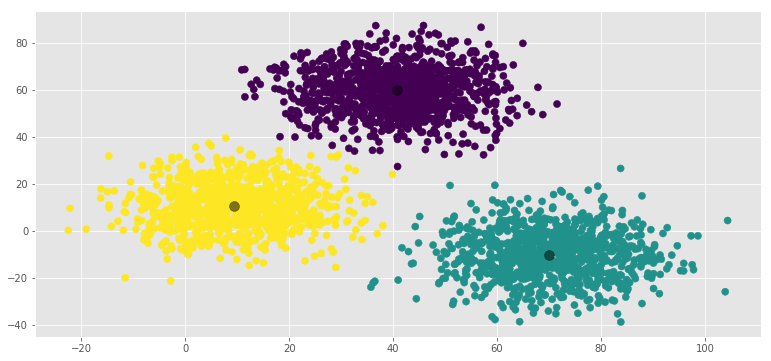

In [57]:
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

# K means clustering - sklearn approach

In [58]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

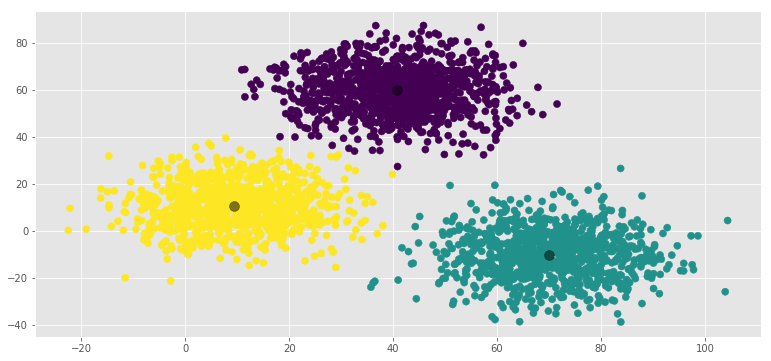

In [59]:
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.5)

### 3 dimensional data

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (13, 6)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

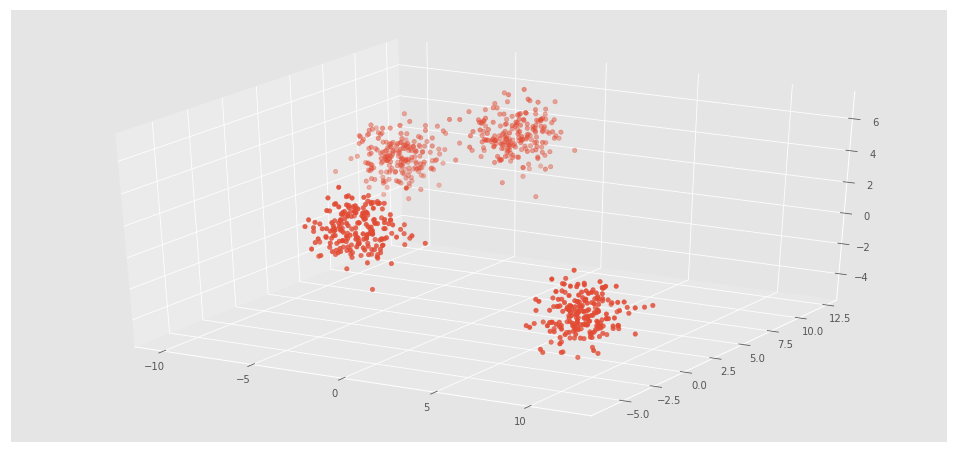

In [63]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [64]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

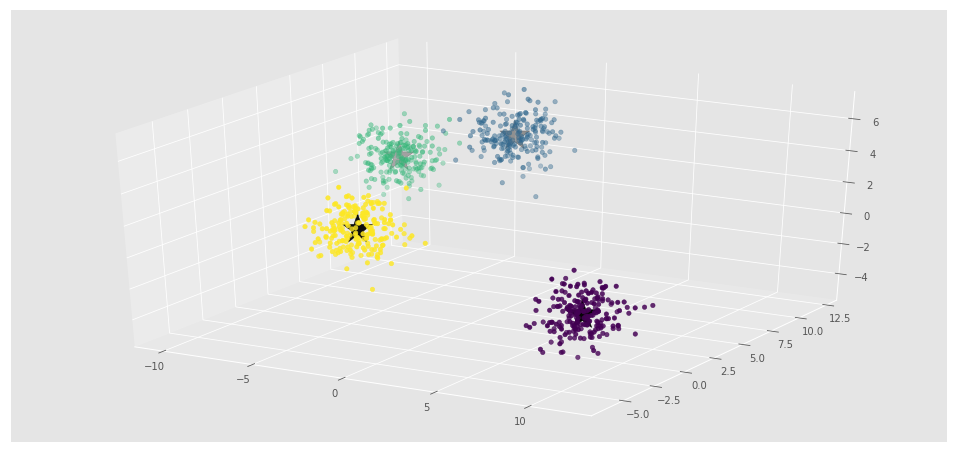

In [65]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## How to select the number of K

### Method 1: Choose the number of clusters using the silhouette statistic

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [90]:
n_clusters = range(2, 13, 1)
def silhouette(data,n_clusters=range(2, 13, 1)):

    silhouette_stats = []
    for i in n_clusters:
        # print("Fitting %s clusters..." % i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=40, max_iter=100000000, verbose=False, n_jobs=1,random_state=10)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_stats.append(silhouette_score(data, labels, metric='euclidean'))
    return silhouette_stats

In [93]:
silhouette(X)

[0.61429207790734575,
 0.73092736629119348,
 0.70097146414025413,
 0.55784946546646119,
 0.46246536526891291,
 0.32131742489646087,
 0.23370988642525461,
 0.23181613401724846,
 0.23727315335109253,
 0.23671421678914201,
 0.24060913448390372]

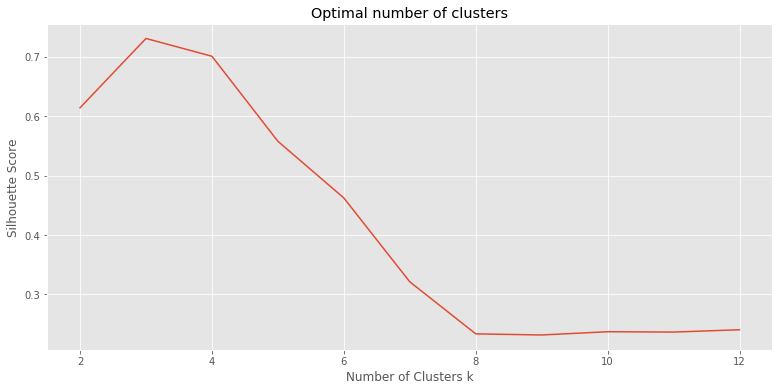

In [94]:
plt.plot(n_clusters, silhouette(X))
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.title('Optimal number of clusters')
plt.show()

### Method 2: Choose the number of clusters using Within Group Sum of Squares

In [97]:
# n_clusters = range(2, 13, 1)
def SST(data,n_clusters=range(2, 13, 1)):

    SST = []
    for i in n_clusters:
        # print("Fitting %s clusters..." % i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=40, max_iter=100000000, verbose=False, n_jobs=1, random_state=10)
        kmeans.fit(data)
        within_SST = kmeans.inertia_
        SST.append(within_SST)
    return SST

In [98]:
SST(X)

[19932.893786916276,
 5533.5271700265166,
 2458.9424826010763,
 2298.1146218537874,
 2143.8035740590403,
 1999.4217319330623,
 1856.4034748714148,
 1753.8182988132744,
 1659.8095302248807,
 1561.4442945199637,
 1463.2187985941027]

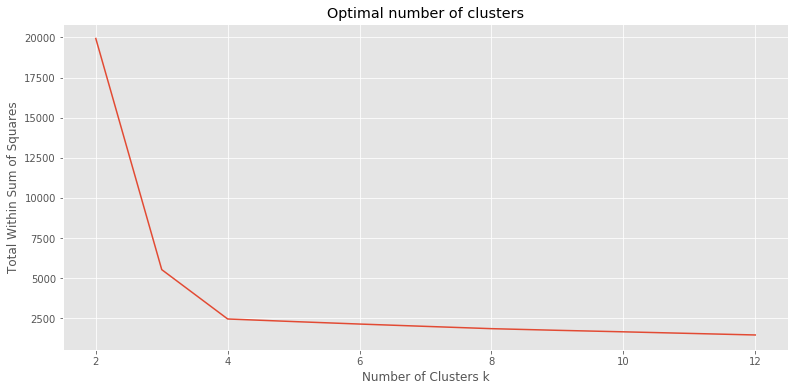

In [100]:
plt.plot(n_clusters, SST(X))
plt.xlabel('Number of Clusters k')
plt.ylabel('Total Within Sum of Squares')
plt.title('Optimal number of clusters')
plt.show()

### Method 3: Choose the number of clusters by cluster size

In [101]:
def checksize(data,n_clusters=range(2, 13, 1)):

    for i in n_clusters:
        cluster_count = []
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=40, max_iter=100000000, verbose=False, n_jobs=1, random_state=10)
        kmeans.fit(data)
        for j in range(0,i):
            count = len(kmeans.labels_[kmeans.labels_==j])
            cluster_count.append(count)
        print(sorted(cluster_count))

In [102]:
checksize(X)

[400, 400]
[200, 200, 400]
[200, 200, 200, 200]
[94, 106, 200, 200, 200]
[91, 91, 109, 110, 199, 200]
[86, 88, 92, 108, 112, 114, 200]
[78, 87, 95, 96, 104, 105, 112, 123]
[58, 70, 74, 75, 93, 96, 104, 107, 123]
[58, 63, 67, 69, 71, 72, 95, 95, 105, 105]
[61, 63, 64, 68, 68, 69, 69, 69, 70, 97, 102]
[59, 62, 62, 62, 63, 66, 69, 69, 71, 71, 71, 75]
